### Multi Layer Perceptron

In [1]:
#%conda install -c conda-forge geoplot
#%conda install -c conda-forge folium

Bibliotecas a utilizar:

In [2]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
import geoplot
import folium
import geopandas as gpd
from shapely.geometry import Point, Polygon

Especificación de encabezados

In [4]:
header = ["Lat","Lon","Urbano", "Cuerpos_agua", "Cultivo_riego","Cultivo Temporal","Past&Mat","Suelo_desnudo",
         "Vegetacion","Pendiente","Dist_ANPS","Dist_agua","Dist_veget","Dist_urb","Dist_centro","Dist_carreteras","Costo"
          ,"No_Urb","Difer"]

Lectura de datos

In [7]:
#esto que incluye? 
data = pd.read_csv("2000.csv",names=header)

In [8]:
data

,Lat,Lon,Urbano,Cuerpos_agua,Cultivo_riego,Cultivo Temporal,Past&Mat,Suelo_desnudo,Vegetacion,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,No_Urb,Difer
0,260628.478257,2.197830e+06,0,1,0,0,0,0,0,6.054499,19979.177361,0.000000,899.990695,3275.311829,20135.641180,3494.114484,97.324288,1,0
1,260658.475127,2.197830e+06,0,1,0,0,0,0,0,0.000000,19959.328482,0.000000,924.161269,3288.061757,20121.447884,3504.785363,97.473378,1,0
2,260688.471998,2.197830e+06,0,1,0,0,0,0,0,0.000000,19939.504971,0.000000,948.664575,3301.035032,20107.289320,3515.679803,97.622467,1,0
3,260598.481386,2.197800e+06,0,1,0,0,0,0,0,10.219378,19976.598333,0.000000,858.010608,3235.495185,20123.468711,3455.515883,96.815105,1,0
4,260628.478257,2.197800e+06,0,1,0,0,0,0,0,0.000000,19956.701801,0.000000,882.311384,3248.124382,20109.222078,3466.045990,96.964194,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325631,271007.395459,2.151833e+06,0,0,0,0,1,0,0,12.604383,7326.598778,7502.007921,2430.380807,15874.987952,28276.905407,5847.119329,111.570693,0,0
1325632,270947.401717,2.151803e+06,0,0,0,0,1,0,0,8.293805,7362.572123,7491.638443,2461.116840,15861.646267,28305.180293,5855.054017,111.632609,0,0
1325633,270977.398588,2.151803e+06,0,0,0,0,1,0,0,15.909876,7359.454996,7508.974118,2460.568362,15880.100758,28306.022707,5865.111503,111.781698,0,0
1325634,271007.395459,2.151803e+06,0,0,0,0,1,0,0,20.260141,7356.458865,7526.389418,2460.385508,15898.590424,28306.896883,5875.304926,111.930787,0,0


Seleccion de dados no urbanos que son en los cuales se va a realizar la predicción.

In [9]:
data_urb=data[data["No_Urb"]==0]

Mezcla del dataset

In [10]:
df = data_urb.sample(frac = 1)

In [11]:
df

,Lat,Lon,Urbano,Cuerpos_agua,Cultivo_riego,Cultivo Temporal,Past&Mat,Suelo_desnudo,Vegetacion,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,No_Urb,Difer
835002,260208.522070,2.172446e+06,0,0,0,0,1,0,0,13.900669,684.145160,1966.784571,1816.112166,2005.758472,12558.731947,630.098728,22.356823,0,1
878221,268457.661464,2.171306e+06,0,0,0,0,0,0,1,20.001783,149.984353,3870.643105,0.000000,3160.915792,8956.104516,659.931152,22.405678,0,0
1063383,267137.799161,2.166325e+06,0,0,0,0,0,0,1,8.530765,3233.302791,5275.949353,0.000000,5871.281382,14101.465104,2403.228379,50.981353,0,0
105394,259548.590918,2.190839e+06,0,0,0,0,1,0,0,11.648635,15092.699763,6085.774821,540.084624,3490.999964,15104.457159,859.164515,58.415724,0,0
1307358,264288.096461,2.155194e+06,0,0,0,1,0,0,0,8.293805,7455.846268,2308.475926,123.682165,9630.502518,25588.503800,706.218477,45.116080,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662063,273467.138842,2.176527e+06,0,0,0,1,0,0,0,0.000000,189.721820,4200.141626,228.458615,953.552253,4861.751018,715.668296,17.417557,0,1
274291,239450.687667,2.185648e+06,0,0,0,0,0,0,1,8.049467,24523.991335,6449.111330,0.000000,3586.134437,31214.318439,2637.812069,80.135855,0,0
1136470,267137.799161,2.163925e+06,0,0,0,1,0,0,0,8.293805,2175.794526,4334.664682,29.996871,5760.993237,16453.870093,2264.936049,52.111968,0,0
832763,268667.639558,2.172506e+06,0,0,0,0,0,0,1,37.112507,757.147601,4227.932522,0.000000,2402.765428,7737.938203,456.999489,19.477463,0,0


Eliminación de columnas no útiles

In [12]:
df.drop(['Lat','Lon','Cuerpos_agua','Cultivo_riego','Cultivo Temporal','Past&Mat','Suelo_desnudo','Vegetacion',
        'No_Urb','Urbano'], axis = 1,inplace=True)

In [13]:
df

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,Difer
835002,13.900669,684.145160,1966.784571,1816.112166,2005.758472,12558.731947,630.098728,22.356823,1
878221,20.001783,149.984353,3870.643105,0.000000,3160.915792,8956.104516,659.931152,22.405678,0
1063383,8.530765,3233.302791,5275.949353,0.000000,5871.281382,14101.465104,2403.228379,50.981353,0
105394,11.648635,15092.699763,6085.774821,540.084624,3490.999964,15104.457159,859.164515,58.415724,0
1307358,8.293805,7455.846268,2308.475926,123.682165,9630.502518,25588.503800,706.218477,45.116080,0
...,...,...,...,...,...,...,...,...,...
662063,0.000000,189.721820,4200.141626,228.458615,953.552253,4861.751018,715.668296,17.417557,1
274291,8.049467,24523.991335,6449.111330,0.000000,3586.134437,31214.318439,2637.812069,80.135855,0
1136470,8.293805,2175.794526,4334.664682,29.996871,5760.993237,16453.870093,2264.936049,52.111968,0
832763,37.112507,757.147601,4227.932522,0.000000,2402.765428,7737.938203,456.999489,19.477463,0


Revisión de columnas predictoras y columna objetivo

In [14]:
df['Difer'].value_counts()

#aqui hay que hcer esto:
# escoger aleatoriamente el 70% de las 80667 celdas que pasaron a ser urbanizadas n = 0.7* df['Difer'].value_counts(1)
# escoger aleatoriamente n vectores con etiqueta 0.

0    1001062
1      80667
Name: Difer, dtype: int64

In [15]:
df_cambio=df[df["Difer"]==1]
df_no_cambio=df[df["Difer"]==0]

In [16]:
new_set=pd.concat([df_cambio,df_no_cambio.iloc[:80667,:]],axis=0)

In [17]:
new_set = new_set.sample(frac = 1)
new_set

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,Difer
821059,2.024868,456.917230,1972.988132,0.000000,517.957370,8425.228039,169.710075,17.381698,1
938025,11.648635,84.855037,4983.038119,0.000000,1200.075299,12548.277080,29.996871,21.776019,0
548018,21.568129,1994.291899,5004.858319,0.000000,1183.648839,9531.892197,917.958132,22.775668,1
826192,5.710593,1620.942203,1127.420970,29.996871,870.017264,9176.155752,201.267150,20.208229,1
741494,4.520227,2068.828214,5941.053488,30.004701,134.178100,5493.711789,484.723337,14.533907,1
...,...,...,...,...,...,...,...,...,...
284238,0.000000,15288.494182,2269.976915,308.898294,4648.063944,20700.761004,1412.101594,44.770775,0
687946,15.069956,11771.683711,11149.553619,1021.767886,600.094026,21384.449726,342.072580,28.022548,0
707681,2.862405,1113.756233,4167.112332,241.858044,531.556949,5534.202734,89.990612,10.967552,1
656935,6.054499,666.152888,6376.016179,649.048814,29.996871,3598.112525,365.020371,11.230886,1


In [18]:
df.iloc[:,:-1]

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo
835002,13.900669,684.145160,1966.784571,1816.112166,2005.758472,12558.731947,630.098728,22.356823
878221,20.001783,149.984353,3870.643105,0.000000,3160.915792,8956.104516,659.931152,22.405678
1063383,8.530765,3233.302791,5275.949353,0.000000,5871.281382,14101.465104,2403.228379,50.981353
105394,11.648635,15092.699763,6085.774821,540.084624,3490.999964,15104.457159,859.164515,58.415724
1307358,8.293805,7455.846268,2308.475926,123.682165,9630.502518,25588.503800,706.218477,45.116080
...,...,...,...,...,...,...,...,...
662063,0.000000,189.721820,4200.141626,228.458615,953.552253,4861.751018,715.668296,17.417557
274291,8.049467,24523.991335,6449.111330,0.000000,3586.134437,31214.318439,2637.812069,80.135855
1136470,8.293805,2175.794526,4334.664682,29.996871,5760.993237,16453.870093,2264.936049,52.111968
832763,37.112507,757.147601,4227.932522,0.000000,2402.765428,7737.938203,456.999489,19.477463


Separación de los datos en entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# aqui no estás balanceando los datos. 
X_train, X_test, y_train, y_test = train_test_split(new_set.iloc[:,:-1], new_set["Difer"], test_size=0.33, random_state=42)

Función de precisión

In [21]:
#Esto esta bien.
def accuracy(confusion_matrix):
    """
    Esta función mide la precisión del modelo 
    Precisión = verdaderos positivs + verdaderos negativos / la suma de todos los elementos de la matriz de confusión.
    """
    
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

Definición del modelo y entrenamiento


In [22]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=500,activation = 'logistic',solver='adam',random_state=1)

In [23]:
linear_classifier = MLPClassifier(hidden_layer_sizes=(1), max_iter=500,activation = 'identity',solver='adam',random_state=1)

In [24]:
classifier

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=500, random_state=1)

In [25]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 100, 50),
              max_iter=500, random_state=1)

In [26]:
linear_classifier.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=1, max_iter=500,
              random_state=1)

In [27]:
y_pred = classifier.predict(X_test)
linear_y_pred =  linear_classifier.predict(X_test)

In [28]:
np.sum(y_pred)

28453

In [29]:
np.sum(linear_y_pred)

28966

Evaluación con métricas básicas


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
#MLP
presencia_estimada = np.sum((y_pred==1)*1)

#Log Reg
presencia_estimada_linear = np.sum((linear_y_pred==1)*1)

#presencia observada: suelo urbano construido 2000-2018
presencia_observada = np.sum((y_test==1)*1)

print("presencia estimada MLP:", presencia_estimada)

print("presencia estimada Linear:", presencia_estimada_linear)

print("presencia observada", presencia_observada)

presencia estimada MLP: 28453
presencia estimada Linear: 28966
presencia observada 26602


In [32]:
# ajustar umbral con presencia observada.
# que umbral nos produce la presencia observada?

In [33]:
cm = confusion_matrix(y_pred, y_test)

cm_linear = confusion_matrix(linear_y_pred, y_test)

In [34]:
print("Accuracy of MLPClassifier : ",'', accuracy(cm))
print("Accuracy of Linear Regres : ",'', accuracy(cm_linear))


Accuracy of MLPClassifier :   0.8891268007738398
Accuracy of Linear Regres :   0.8443304971732312


In [35]:
print(cm)
print(cm_linear)

[[22762  2026]
 [ 3877 24576]]
[[21313  2962]
 [ 5326 23640]]


In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8891268007738398

In [37]:
classifier.score(X_test, y_test)

0.8891268007738398

Coeficiente de correlación de matthews

In [38]:
from sklearn.metrics import matthews_corrcoef

Curva ROC

In [39]:
#Resultados probabilidad clasificador MLP
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#Resultados probabilidad clasificador Reg Log
linear_y_pred_proba = linear_classifier.predict_proba(X_test)[::,1]

In [40]:
y_pred_proba_sorted = np.copy(y_pred_proba)
linear_y_pred_proba_sorted = np.copy(linear_y_pred_proba)

y_pred_proba_sorted.sort()
linear_y_pred_proba_sorted.sort()

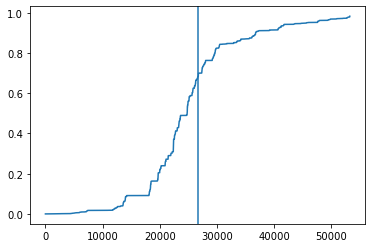

In [41]:
plt.plot(y_pred_proba_sorted)
plt.axvline(x = len(y_pred_proba_sorted)-presencia_observada)

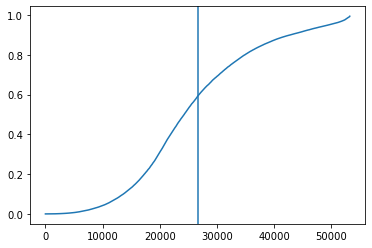

In [42]:
plt.plot(linear_y_pred_proba_sorted)
plt.axvline(x = len(linear_y_pred_proba_sorted)-presencia_observada)

In [43]:
#Queremos conocer el umbral que produce presencia observada

th_ann = y_pred_proba_sorted[-presencia_observada-1]
th_linear = linear_y_pred_proba_sorted[-presencia_observada-1]

th_linear


0.5920838884066928

In [44]:
tn, fp, fn, tp = confusion_matrix(y_pred_proba>th_ann, y_test).ravel()

fprp=fp/(fp+tn)
tprp=tp/(tp+fn)

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print("fpr",fprp)
print("tpr",tprp)

TN: 23669
FP: 2970
FN: 2970
TP: 23632
fpr 0.1114906715717557
tpr 0.8883542590782648


In [45]:
tn, fp, fn, tp = confusion_matrix(linear_y_pred_proba>th_linear, y_test).ravel()

lfprp=fp/(fp+tn)
ltprp=tp/(tp+fn)

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print("fpr",lfprp)
print("tpr",ltprp)

TN: 22536
FP: 4103
FN: 4103
TP: 22499
fpr 0.15402229813431434
tpr 0.8457634764303436


In [46]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
linear_fpr, linear_tpr, _ = metrics.roc_curve(y_test,  linear_y_pred_proba)

In [47]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

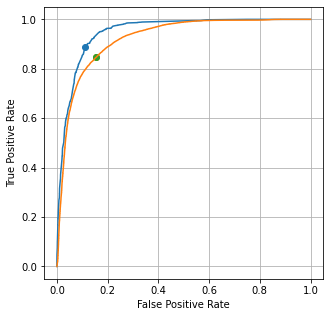

In [48]:
plt.plot(fpr,tpr)
#plt.axvline(x = fprp, ymin=0, ymax=1, color = 'r', linestyle = 'dashed')
#plt.axhline(y = tprp, color = 'r', linestyle = 'dashed')
plt.scatter(fprp,tprp)


plt.plot(linear_fpr,linear_tpr)
plt.scatter(lfprp,ltprp)
#plt.axvline(x = lfprp, ymin=0, ymax=1, color = 'g', linestyle = 'dashed')
#plt.axhline(y = ltprp, color = 'g', linestyle = 'dashed')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.scatter(lfprp,ltprp) 

plt.grid()
plt.show()

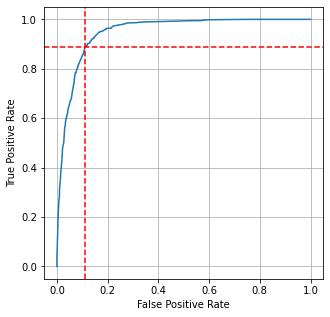

In [49]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axvline(x = fprp, ymin=0, ymax=1, color = 'r', linestyle = 'dashed')
plt.axhline(y = tprp, color = 'r', linestyle = 'dashed')
plt.grid()
plt.show()

In [50]:
fpr, tpr, _ = metrics.roc_curve(y_test,  linear_y_pred_proba)

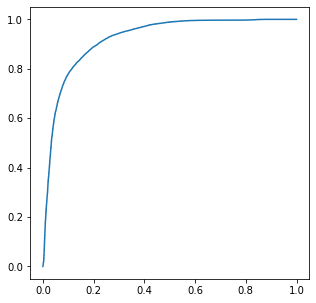

In [51]:
plt.plot(fpr,tpr)

In [52]:
metrics.auc(fpr, tpr)

0.9225936971445331

In [53]:
np.sum(y_pred_proba>0.5)

28453

In [54]:
#presencia
y_test.sum()



26602

In [55]:
y_pred_proba

array([0.66992328, 0.96956536, 0.95179068, ..., 0.82410648, 0.95201479,
       0.00364708])

#### Predicción con el modelo ya entrenado

Lectura y preprocesamiento del datset

In [56]:
data2018 = pd.read_csv("2018.csv",names=header)

In [57]:
data2018

,Lat,Lon,Urbano,Cuerpos_agua,Cultivo_riego,Cultivo Temporal,Past&Mat,Suelo_desnudo,Vegetacion,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,No_Urb,Difer
0,260628.478257,2.197830e+06,0,1,0,0,0,0,0,6.054499,19979.177361,0.000000,899.990695,3275.311829,20135.641180,1332.196444,48.608915,1,NaN
1,260658.475127,2.197830e+06,0,1,0,0,0,0,0,0.000000,19959.328482,0.000000,924.161269,3288.061757,20121.447884,1307.998737,48.248915,1,NaN
2,260688.471998,2.197830e+06,0,1,0,0,0,0,0,0.000000,19939.504971,0.000000,948.664575,3301.035032,20107.289320,1284.045814,47.888915,1,NaN
3,260598.481386,2.197800e+06,0,1,0,0,0,0,0,10.219378,19976.598333,0.000000,858.010608,3235.495185,20123.468711,1339.596682,48.695535,1,NaN
4,260628.478257,2.197800e+06,0,1,0,0,0,0,0,0.000000,19956.701801,0.000000,882.311384,3248.124382,20109.222078,1314.850934,48.358586,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325651,271007.395459,2.151833e+06,0,0,0,0,1,0,0,12.604383,7326.598778,7502.007921,2430.380807,14743.328712,28276.905407,0.000000,96.129337,0,NaN
1325652,270947.401717,2.151803e+06,0,0,0,0,1,0,0,8.293805,7362.572123,7491.638443,2461.116840,14771.118181,28305.180293,59.993741,96.414020,0,NaN
1325653,270977.398588,2.151803e+06,0,0,0,0,1,0,0,15.909876,7359.454996,7508.974118,2460.568362,14772.184190,28306.022707,29.996871,96.376848,0,NaN
1325654,271007.395459,2.151803e+06,0,0,0,0,1,0,0,20.260141,7356.458865,7526.389418,2460.385508,14773.311031,28306.896883,0.000000,96.174348,0,NaN


In [58]:
data_urb_2018=data2018[data2018["No_Urb"]==0]

In [59]:
data_urb_2018

,Lat,Lon,Urbano,Cuerpos_agua,Cultivo_riego,Cultivo Temporal,Past&Mat,Suelo_desnudo,Vegetacion,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,No_Urb,Difer
9,261048.434444,2.197800e+06,0,0,0,0,1,0,0,6.379370,19680.839119,212.111013,1248.803589,3447.554694,19913.443890,997.266806,44.300857,0,NaN
20,260868.453221,2.197770e+06,0,0,0,0,1,0,0,4.520227,19775.810448,29.996871,1073.256704,3330.856765,19969.945500,1106.352244,45.742605,0,NaN
21,260898.450092,2.197770e+06,0,0,0,0,1,0,0,0.000000,19756.121616,59.993741,1100.167146,3345.547238,19955.995077,1083.755330,45.405656,0,NaN
22,260928.446962,2.197770e+06,0,0,0,0,1,0,0,6.379370,19736.458733,89.990612,1127.233414,3360.441263,19942.080016,1061.525113,45.146802,0,NaN
23,260958.443833,2.197770e+06,0,0,0,0,1,0,0,5.710593,19716.821879,119.987482,1154.444548,3375.536145,19928.200391,1039.685116,44.786802,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325651,271007.395459,2.151833e+06,0,0,0,0,1,0,0,12.604383,7326.598778,7502.007921,2430.380807,14743.328712,28276.905407,0.000000,96.129337,0,NaN
1325652,270947.401717,2.151803e+06,0,0,0,0,1,0,0,8.293805,7362.572123,7491.638443,2461.116840,14771.118181,28305.180293,59.993741,96.414020,0,NaN
1325653,270977.398588,2.151803e+06,0,0,0,0,1,0,0,15.909876,7359.454996,7508.974118,2460.568362,14772.184190,28306.022707,29.996871,96.376848,0,NaN
1325654,271007.395459,2.151803e+06,0,0,0,0,1,0,0,20.260141,7356.458865,7526.389418,2460.385508,14773.311031,28306.896883,0.000000,96.174348,0,NaN


In [60]:
data_urb_2018.drop(['Lat','Lon','Cuerpos_agua','Cultivo_riego','Cultivo Temporal','Past&Mat','Suelo_desnudo','Vegetacion',
        'No_Urb','Urbano','Difer'], axis = 1,inplace=True)

/var/folders/k9/wpfgnz550_n_k3t9tg8scnlw0000gn/T/ipykernel_80911/3980385185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_urb_2018.drop(['Lat','Lon','Cuerpos_agua','Cultivo_riego','Cultivo Temporal','Past&Mat','Suelo_desnudo','Vegetacion',


In [61]:
data_urb_2018

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo
9,6.379370,19680.839119,212.111013,1248.803589,3447.554694,19913.443890,997.266806,44.300857
20,4.520227,19775.810448,29.996871,1073.256704,3330.856765,19969.945500,1106.352244,45.742605
21,0.000000,19756.121616,59.993741,1100.167146,3345.547238,19955.995077,1083.755330,45.405656
22,6.379370,19736.458733,89.990612,1127.233414,3360.441263,19942.080016,1061.525113,45.146802
23,5.710593,19716.821879,119.987482,1154.444548,3375.536145,19928.200391,1039.685116,44.786802
...,...,...,...,...,...,...,...,...
1325651,12.604383,7326.598778,7502.007921,2430.380807,14743.328712,28276.905407,0.000000,96.129337
1325652,8.293805,7362.572123,7491.638443,2461.116840,14771.118181,28305.180293,59.993741,96.414020
1325653,15.909876,7359.454996,7508.974118,2460.568362,14772.184190,28306.022707,29.996871,96.376848
1325654,20.260141,7356.458865,7526.389418,2460.385508,14773.311031,28306.896883,0.000000,96.174348


In [62]:
copy_2018 = data_urb_2018.copy()

In [63]:
copy_2018 = copy_2018.sample(frac = 1)

In [64]:
copy_2018

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo
881982,6.379370,6753.685971,6517.490588,94.880721,2659.752049,18356.517715,2372.632414,57.996476
880267,21.251493,1075.337539,2743.070756,0.000000,127.282556,9797.110278,1513.654613,35.247297
886803,10.219378,1279.206915,6348.672674,0.000000,1600.299988,9220.918442,1031.126285,34.572895
1109810,0.000000,10479.962803,7754.671381,3657.569720,900.640718,22348.872770,29.996871,23.340363
1055934,5.710593,8449.807457,5904.408655,2490.390210,1680.092697,20332.384299,1516.269083,40.060178
...,...,...,...,...,...,...,...,...
35281,6.379370,15423.534954,3513.480879,169.710075,2960.117136,15363.341790,2002.656431,54.932109
1059205,12.755872,5795.240856,2679.913978,0.000000,1631.483687,15858.506097,29.996871,21.701811
1239777,5.710593,400.213453,4880.349476,296.992631,6535.213426,20043.888015,149.998449,34.071479
289530,15.909876,9102.552235,11869.092299,0.000000,2263.721986,8024.408342,2176.813492,37.118897


Predicciones sobre el dataset

In [65]:
predicciones=classifier.predict_proba(copy_2018)

In [66]:
predicciones.shape

(1002887, 2)

Asignación de las predicciones a su respectiva observación

In [67]:
copy_2018 = copy_2018.reindex(columns = copy_2018.columns.tolist() + ["Proba_0", "Proba_1"])

copy_2018

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,Proba_0,Proba_1
881982,6.379370,6753.685971,6517.490588,94.880721,2659.752049,18356.517715,2372.632414,57.996476,NaN,NaN
880267,21.251493,1075.337539,2743.070756,0.000000,127.282556,9797.110278,1513.654613,35.247297,NaN,NaN
886803,10.219378,1279.206915,6348.672674,0.000000,1600.299988,9220.918442,1031.126285,34.572895,NaN,NaN
1109810,0.000000,10479.962803,7754.671381,3657.569720,900.640718,22348.872770,29.996871,23.340363,NaN,NaN
1055934,5.710593,8449.807457,5904.408655,2490.390210,1680.092697,20332.384299,1516.269083,40.060178,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35281,6.379370,15423.534954,3513.480879,169.710075,2960.117136,15363.341790,2002.656431,54.932109,NaN,NaN
1059205,12.755872,5795.240856,2679.913978,0.000000,1631.483687,15858.506097,29.996871,21.701811,NaN,NaN
1239777,5.710593,400.213453,4880.349476,296.992631,6535.213426,20043.888015,149.998449,34.071479,NaN,NaN
289530,15.909876,9102.552235,11869.092299,0.000000,2263.721986,8024.408342,2176.813492,37.118897,NaN,NaN


In [68]:
copy_2018

,Pendiente,Dist_ANPS,Dist_agua,Dist_veget,Dist_urb,Dist_centro,Dist_carreteras,Costo,Proba_0,Proba_1
881982,6.379370,6753.685971,6517.490588,94.880721,2659.752049,18356.517715,2372.632414,57.996476,NaN,NaN
880267,21.251493,1075.337539,2743.070756,0.000000,127.282556,9797.110278,1513.654613,35.247297,NaN,NaN
886803,10.219378,1279.206915,6348.672674,0.000000,1600.299988,9220.918442,1031.126285,34.572895,NaN,NaN
1109810,0.000000,10479.962803,7754.671381,3657.569720,900.640718,22348.872770,29.996871,23.340363,NaN,NaN
1055934,5.710593,8449.807457,5904.408655,2490.390210,1680.092697,20332.384299,1516.269083,40.060178,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35281,6.379370,15423.534954,3513.480879,169.710075,2960.117136,15363.341790,2002.656431,54.932109,NaN,NaN
1059205,12.755872,5795.240856,2679.913978,0.000000,1631.483687,15858.506097,29.996871,21.701811,NaN,NaN
1239777,5.710593,400.213453,4880.349476,296.992631,6535.213426,20043.888015,149.998449,34.071479,NaN,NaN
289530,15.909876,9102.552235,11869.092299,0.000000,2263.721986,8024.408342,2176.813492,37.118897,NaN,NaN


In [ ]:
for i in range(1002887):
    copy_2018.at[copy_2018.index[i],'Proba_0']=predicciones[i,0]

In [ ]:
copy_2018

In [ ]:
for i in range(1002887):
    copy_2018.at[copy_2018.index[i],'Proba_1']=predicciones[i,1]

In [ ]:
copy_2018

Asignación de sus respetvivas coordenadas

In [ ]:
copy_2018 = copy_2018.reindex(columns = copy_2018.columns.tolist() + ["Lat", "Lon"])

copy_2018

In [ ]:
data2018

In [ ]:
for i in range(1002887):
    copy_2018.at[copy_2018.index[i],'Lat']=data2018.iloc[copy_2018.index[i],0]
    copy_2018.at[copy_2018.index[i],'Lon']=data2018.iloc[copy_2018.index[i],1]

In [ ]:
copy_2018

Creación del dataset geoespacial

In [ ]:
geometry=[Point(xy) for xy in zip(copy_2018["Lat"], copy_2018["Lon"])]

Sistema de coordenadas

In [ ]:
crs_m={'init':'epsg:32614'}

In [ ]:
geodata=gpd.GeoDataFrame(copy_2018,crs=crs_m, geometry=geometry)

In [ ]:
geodata

Visualización de predicciones

In [ ]:
geodata.plot(figsize=(20, 15),column=geodata['Proba_1'], cmap="viridis_r",legend=True)
plt.grid()

Creación de un mapa binario a partir de un umbral, obtenido del número de seldas urbanas en el mapa real del 2018

In [ ]:
acomodados=geodata.sort_values(by='Proba_1',ascending=False)

In [ ]:
acomodados

In [ ]:
acomodados = acomodados.reindex(columns = acomodados.columns.tolist() + ["Categoria"])

acomodados

In [ ]:
'''for i in range(81011):
    copy_2018.at[copy_2018.index[i],'Lat']=data2018.iloc[copy_2018.index[i],0]
    copy_2018.at[copy_2018.index[i],'Lon']=data2018.iloc[copy_2018.index[i],1]'''

In [ ]:
for i in range(81011):
    acomodados.at[acomodados.index[i],'Categoria']=1

In [ ]:
acomodados

In [ ]:
acomodados['Categoria'] =  acomodados['Categoria'].fillna(0)

In [ ]:
acomodados

In [ ]:
acomodados.plot(figsize=(20, 15),column=acomodados['Categoria'], cmap="viridis",legend=True)
plt.grid()

In [ ]:
acomodados.iloc[81010,:]

In [ ]:
data_urb_2018

In [ ]:
data_urb

In [ ]:
geodata = geodata.reindex(columns = geodata.columns.tolist() + ["Label"])

geodata

In [ ]:
geodata.index[0]

In [ ]:
data_urb.loc[geodata.index[0],['Difer']]

In [ ]:
data

In [ ]:
cont=0
for i in range(1002887):
    try:
        geodata.at[geodata.index[i],'Label']=data.loc[geodata.index[i],['Difer']]
    except Exception as e:
        print("Still Working...",e)

In [ ]:
geodata['Label'].value_counts()

In [ ]:
geodata['Label'].isna().sum()

In [ ]:
geodata['Label'] = geodata['Label'].fillna(0)

In [ ]:
geodata['Label'].isna().sum()

In [ ]:
geodata

In [ ]:
fpr, tpr, _ = metrics.roc_curve(geodata['Label'],  geodata['Proba_1'])

In [ ]:
yhat = np.array(geodata['Proba_1'])
y = np.array(geodata['Label'])
thlinear = getth(yhat,y)

In [ ]:
thinear

In [ ]:
plt.plot(fpr,tpr)
#plt.plot([0.398477, 0.398477], [0, 1], '-')
plt.axvline(0.398477, ymin=0, ymax=1, color='g')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

In [ ]:
metrics.auc(fpr, tpr)

In [ ]:
%store -r fprlog

In [ ]:
%store -r tprlog

In [ ]:
plt.plot(fpr,tpr)
plt.plot(fprlog,tprlog)
#plt.plot([0.398477, 0.398477], [0, 1], '-')
plt.axvline(0.398477, ymin=0, ymax=1, color='g')
plt.axvline(0.282801, ymin=0, ymax=1, color='r')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(["MLP", "Logistic","thres MLP","thres Log"], loc ="lower right")
plt.grid()
plt.show()

Accuracy

In [ ]:
data2=data.sample(frac = 1)

In [ ]:
data2=data2.iloc[:1002887,-1]

In [ ]:
data2

In [ ]:
acomodados_labels=acomodados.iloc[:,-1]

In [ ]:
acomodados_labels

In [ ]:
accuracy_score(data2, acomodados_labels)

In [ ]:
acomodados = acomodados.reindex(columns = acomodados.columns.tolist() + ["Target"])

acomodados

In [ ]:
for i in range(1002887):
    if acomodados.index[i] >=1325636:
        acomodados.at[acomodados.index[i],'Target']=0
    else:
        acomodados.at[acomodados.index[i],'Target']=data.iloc[acomodados.index[i],-1]

In [ ]:
acomodados

In [ ]:
accuracy_score(acomodados["Target"], acomodados["Categoria"])